## 필수과제

- bike 데이터를 가지고 위의 보간법을 진행해 주세요.
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지를 체크해 주세요!
- 수업시간 배운 것외에 2~3가지 정도만 추가로 진행해 보시면 좋을 것 같습니다. 보간법 사용 방법

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('bike_sharing_daily.csv')

In [6]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [7]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


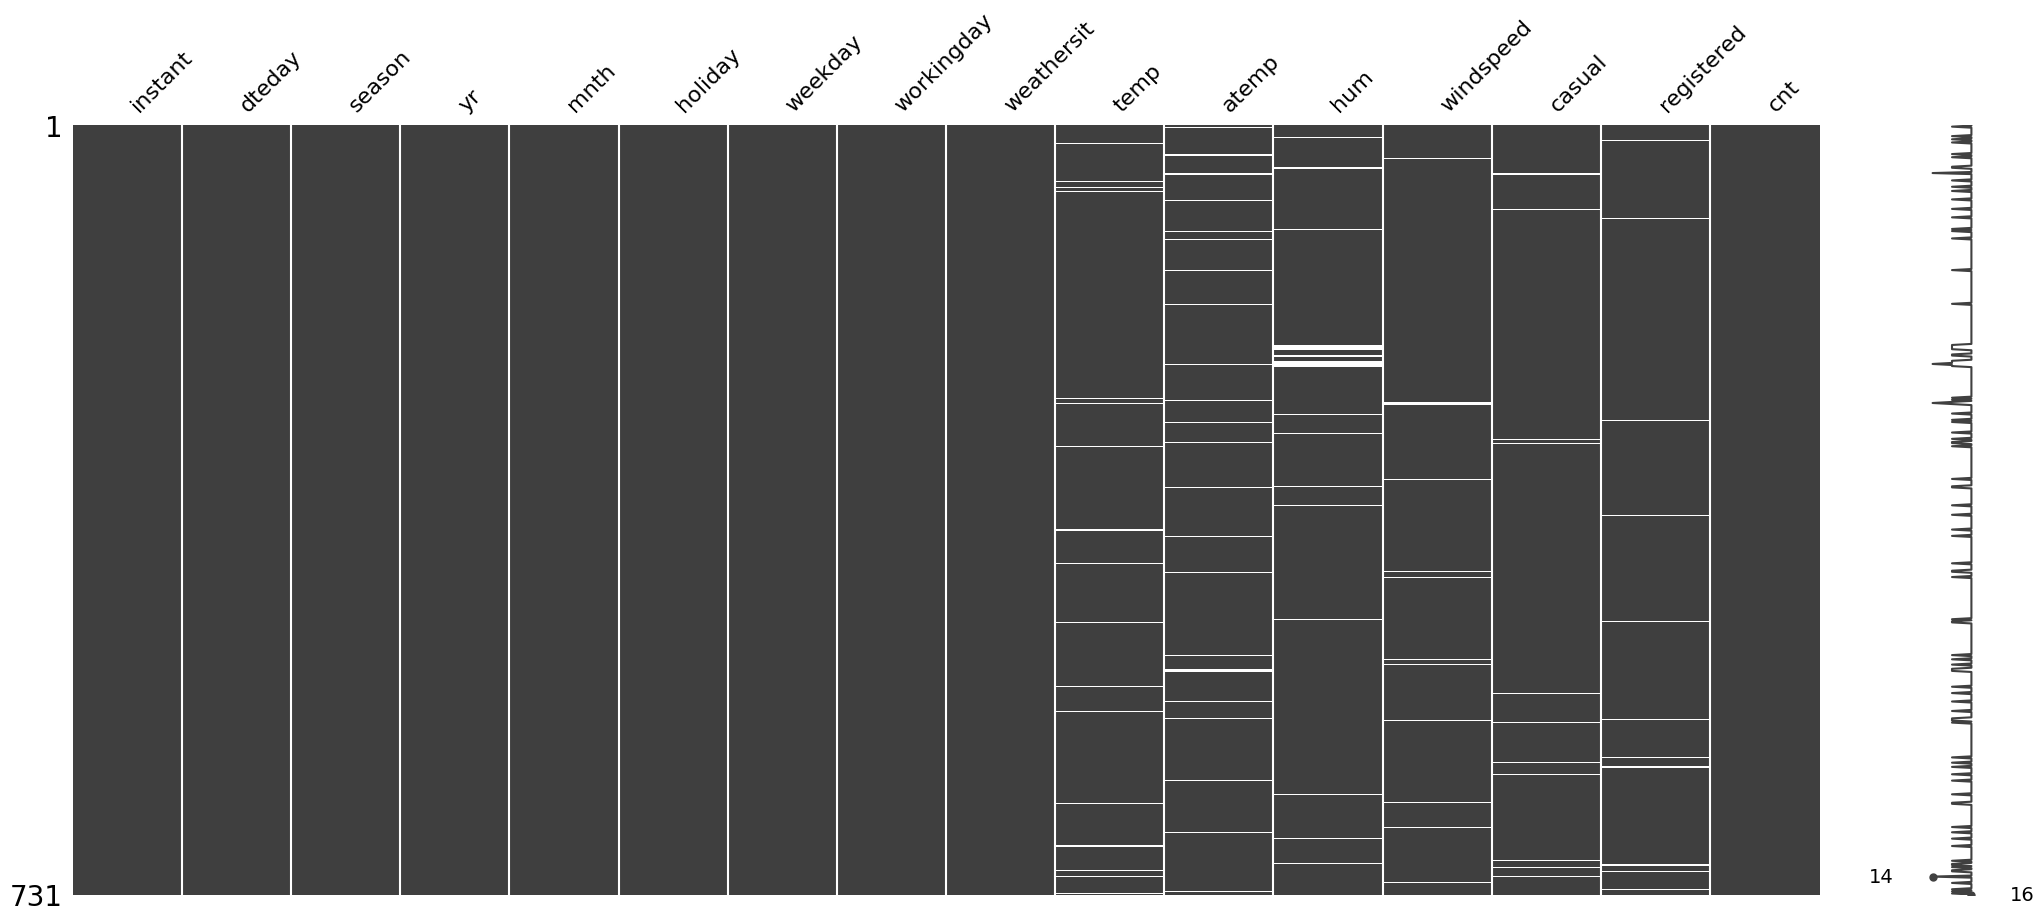

<Axes: >

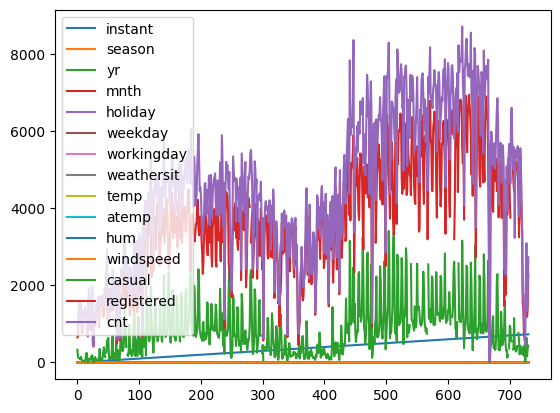

In [14]:
msno.matrix(df)
plt.show()
df.plot()

In [10]:
sports=df.iloc[0:17,6:12]

In [11]:
sports

,weekday,workingday,weathersit,temp,atemp,hum
0,6,0,2,0.344167,0.363625,0.805833
1,0,0,2,0.363478,0.353739,0.696087
2,1,1,1,0.196364,NaN,0.437273
3,2,1,1,0.200000,0.212122,0.590435
4,3,1,1,0.226957,0.229270,0.436957
5,4,1,1,0.204348,0.233209,0.518261
6,5,1,2,0.196522,0.208839,0.498696
7,6,0,2,0.165000,0.162254,0.535833
8,0,0,1,0.138333,0.116175,0.434167
9,1,1,1,0.150833,0.150888,0.482917


In [15]:
sports['atemp'].mean()

0.211278375

In [16]:
sports['atemp'].fillna(0.211278375).to_frame()
# 평균으로 결측값 대체

,atemp
0,0.363625
1,0.353739
2,0.211278
3,0.212122
4,0.229270
5,0.233209
6,0.208839
7,0.162254
8,0.116175
9,0.150888


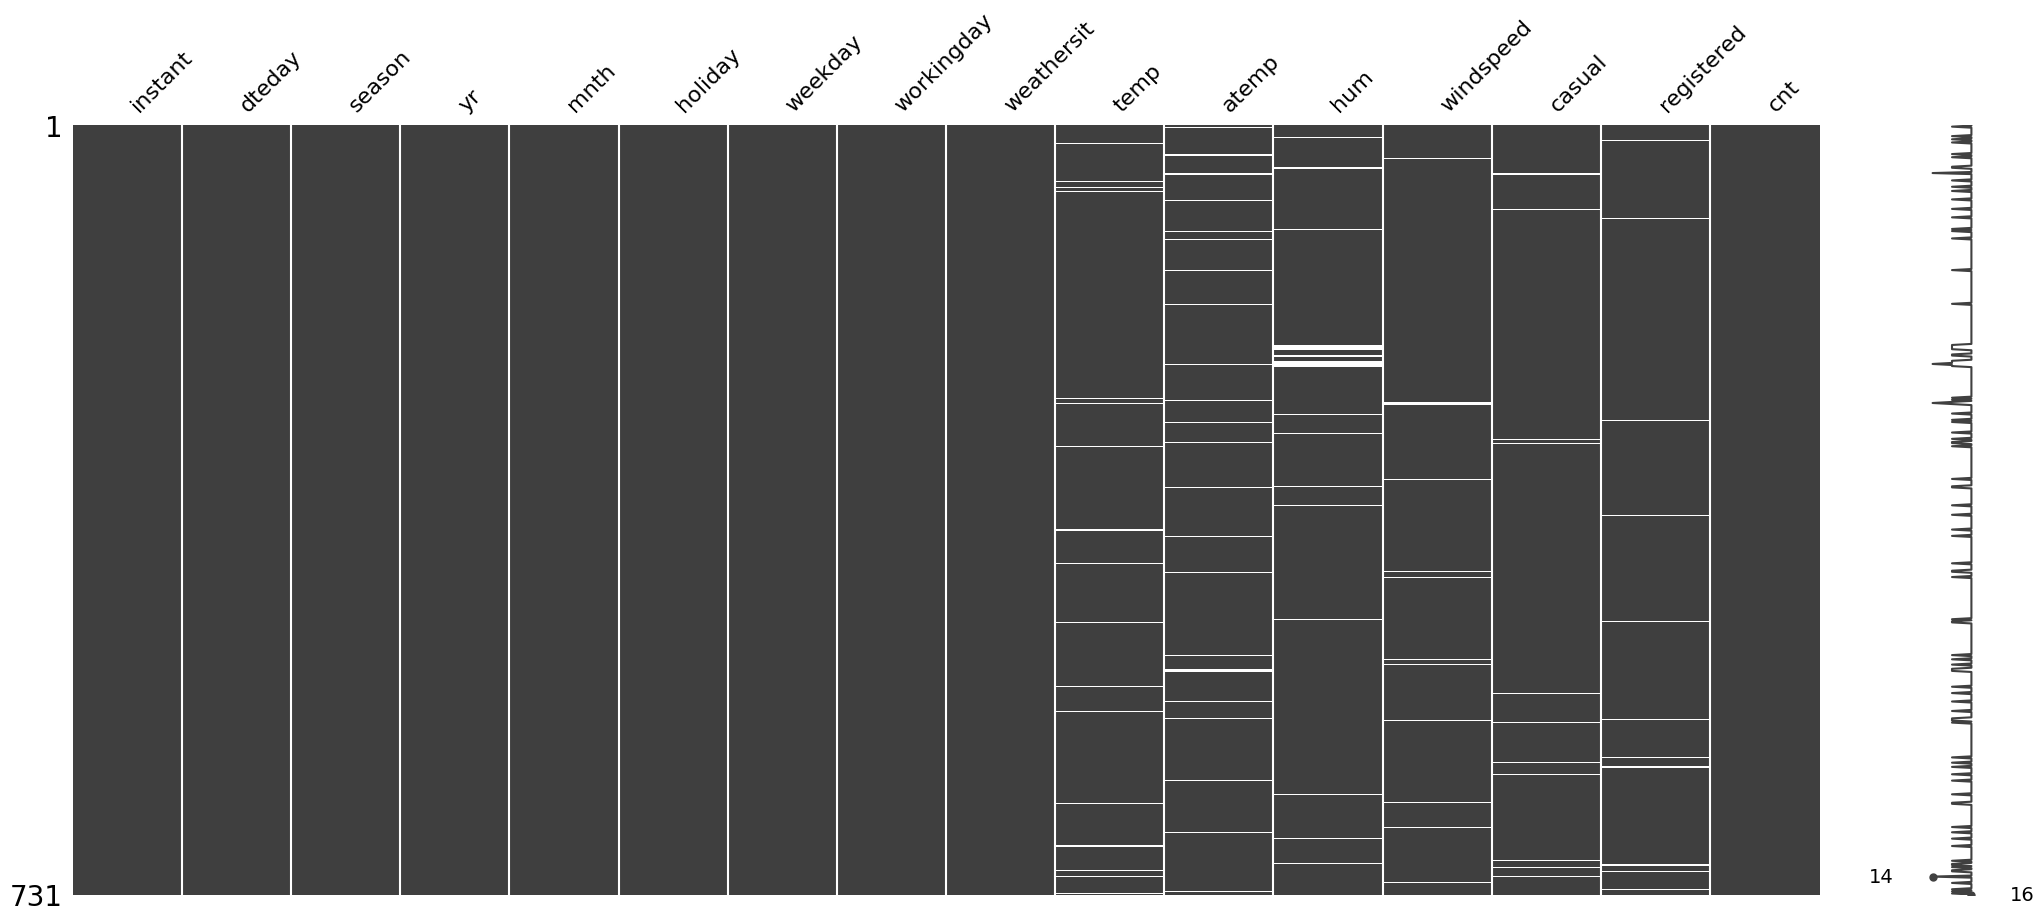

In [18]:
msno.matrix(df)
plt.show()

# 달라진 점 잘 모르겠음

### Krogh 모두가 연속이며 곡률이 부드러운 3차 스플라인을 사용하여 보간

<Axes: >

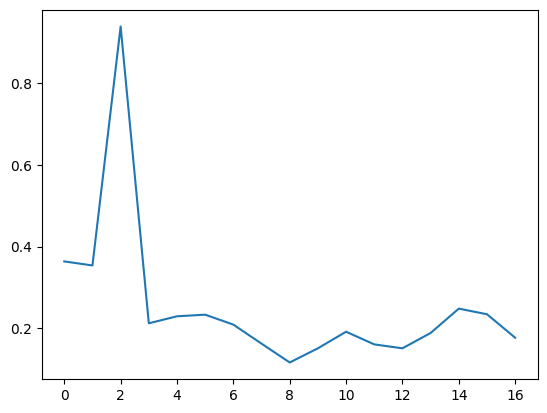

In [24]:
sports['atemp'].interpolate(method='krogh').plot()

## 이건.. 분석하기엔 어려운 자료일 것 같다.

### Nearest (최근접 이웃 보간)

<Axes: >

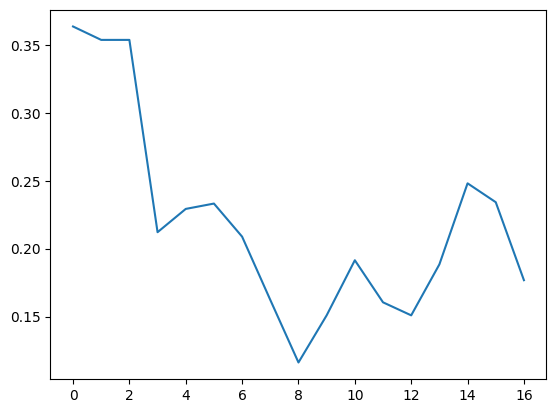

In [25]:
sports['atemp'].interpolate(method='nearest').plot()

#krogh보다는 낫지만 그래도 분석에 유용한 자료는 아닌 것 같다.

### From_derivatives: 파생값을 기반으로 보간

<Axes: >

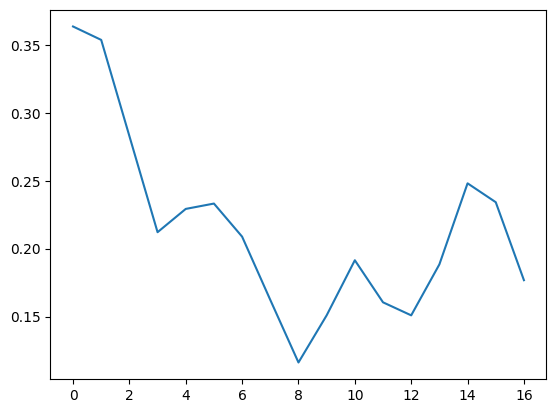

In [26]:
sports['atemp'].interpolate(method='from_derivatives').plot()

## nearest와 별 다른 점이 보이진 않는다.

### Cubicspline

<Axes: >

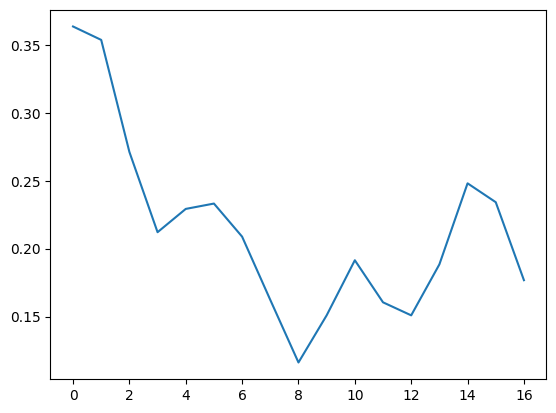

In [28]:
sports['atemp'].interpolate(method='cubic').plot()

## 흠.. 